In [1]:
# Paquete Numpy
import numpy as np

# Generación de números pseudoaleatorios
from numpy import random as rd

# Módulo para las gráficas
from matplotlib import pyplot as plt

# Análisis de datos
import pandas as pd
from pandas import DataFrame as df

<h1 style="background-color:Green;font-size:36pt;color:white">MODELOS DE SIMULACIÓN </h1>

## Universidad Tecnológica La Salle - León, Nicaragua
### Giusseppe Benito Bervis Quintero

# Simulaciones financieras

<FONT COLOR = 'Blue'>  **Ejercicio:** El precio de una acción particular listada en la Bolsa de Valores de Nueva York actualmente cuesta $\$39$. La siguiente distribución de probabilidad muestra cómo se espera que cambie diariamente el precio por acción a lo largo de un periodo de tres meses:

<table style="width:50%">
  <tr>
    <th> Cambio del precio de la acción ($\$$) </th>
    <th> Probabilidad </th>

  </tr>
  <tr>
    <td> -2 </td>
    <td> 0.15 </td>
  </tr>
  
  <tr>
    <td> -1 </td>
    <td> 0.10 </td>
  </tr>
  
  <tr>
    <td> 0 </td>
    <td> 0.15 </td>
  </tr>
  <tr>
    <td> 1 </td>
    <td> 0.20 </td>
  </tr>
  <tr>
    <td> 2 </td>
    <td> 0.20 </td>
  </tr>
  <tr>
    <td> 3 </td>
    <td> 0.10 </td>
  </tr>
  <tr>
    <td> 4 </td>
    <td> 0.10 </td>
  </tr>
</table>

Con el precio actual de $39 por acción, simule el precio por acción durante los siguientes 360 días. ¿Cuál es el precio simulado final por acción? (Realice solo una simulación, y realice la gráfica de la misma) </FONT>

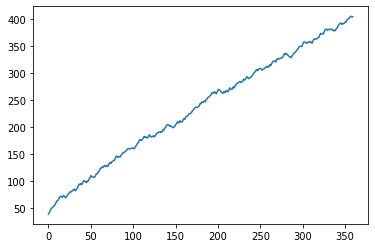

In [3]:
c = 39 #Costo inicial
cambio = [-2,-1,0,1,2,3,4]
pcambio = [0.15,0.1,0.15,0.2,0.2,0.1,0.1]
A = []

for i in range(360):
    A = np.append(A,c)
    ca = rd.choice(cambio,p=pcambio)
    c = c + ca

plt.plot(A)
plt.show()


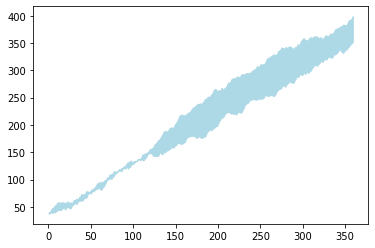

In [7]:

cambio = [-2,-1,0,1,2,3,4]
pcambio = [0.15,0.1,0.15,0.2,0.2,0.1,0.1]

A = []
B = []
for j in range (2):
    c = 39 #Costo inicial
    for i in range(360):
        if j == 0:
            A = np.append(A,c)
        else:
            B.append(c)
        ca = rd.choice(cambio,p=pcambio)
        c = c + ca

plt.fill_between(range(360), A, B, color = 'lightblue')
plt.show()

In [12]:
def DP(L, D, M, Den, e, Visc):
    if M > 0:
        g = 9.81
        V = M / Den * np.pi * D**2 / 4
        Re = Den * V * D / Visc
        f = 1.325 / (np.log(e/1000) /(3.7 * D) + 5.74 / Re**0.9)**2
        Hf = f*(L/D)*V**2/(2*g)
        Dp = Hf*g*Den/(10**5)
        return Dp
    else:
        Dp = 0
        return Dp
DP(2000, 0.2, 50, 999, 0.00046, 7.005*10**(-5))

4.209420514465976e-07

<FONT COLOR = 'Blue'> **Ejercicio :** Del ejemplo anterior, determine la cantidad que se espera tener al final de los 360 días. Realice 10 000 simulaciones. 
- Realice las gráficas de las simulaciones.
- Encuentre un intervalo de confianza del 99% para el precio de la acción al final del año.</FONT>

In [7]:
n = 2 #No. de simulaciones
cambio = [-2,-1,0,1,2,3,4]
pcambio = [0.15,0.1,0.15,0.2,0.2,0.1,0.1]
cft = 0

for j in range(n):
    c = 39 #Precio inicial
    for i in range(360):
        ca = rd.choice(cambio,p=pcambio)
        c = c + ca
        if(i == 359):
            cft = cft + c #Suma de los precios finales
pf = cft/n
print(f"El costo que se espera al final de los 360 días es {pf}")

El costo que se espera al final de los 4 trimestres es 362.934


<FONT COLOR = 'Blue'> **Ejercicio :** Una persona quiere saber cuánto dinero tendrá, aproximadamente, en su cuenta de ahorro, dentro de dos años. Ella gana 450 dólares al mes, los recibe directamente a su cuenta. Gasta aproximadamente 410 dólares al mes (los saca de la cuenta), sigue una distribución de Poisson. La tasa de interés compuesto que le da el banco sigue una distribución uniforme entre 0.1% y 0.5%. 
- ¿Cuánto se espera que tenga al final de los dos años, si considera que al inicio en la cuenta hay 500 dólares y que el pago se realiza al final del primer mes? 
- Realice 100 000 simulaciones.
- Grafique la evolución de las simulaciones.
- Determine un intervalo de confianza del 99% para el dinero que habrá en le cuenta al final de los dos años.
 </FONT>

In [8]:
# No. de simulaciones 
n = 100

# Dinero en la cuenta al final de los 2 años
Dinero_fin = []

for j in range(n):
  # Capital inicial
  C = 500

  # Lista de estados de cuenta
  EC = []

for mes in range(24):
    pago = 450
    gasto = rd.poisson(410)
    i = rd.uniform(0.001, 0.005)
    # Capital final en cada mes
    C = (C - gasto)*(1 + i) + pago

    EC.append(C)

    if mes == 23:
        Dinero_fin.append(C)

  # Gráfica de la evolución de los estados de cuenta
  plt.plot(EC)


# Gráfica de la evolución de los estados de cuenta
plt.xlabel('Mes')
plt.ylabel('Dinero en la cuenta')
plt.title('Evolución de los estados de cuenta en 24 meses')
plt.show()

1501.22
